### Simulating From the Null Hypothesis

Load in the data below, and follow the questions to assist with answering the quiz questions below.

**If you get stuck, notice there is a solution notebook available by pushing the orange jupyter icon in the top left!**

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
np.random.seed(42)

full_data = pd.read_csv('coffee_dataset.csv')
sample_df = full_data.sample(200)
sample_df.head()

,user_id,age,drinks_coffee,height
2402,2874,<21,True,64.357154
2864,3670,>=21,True,66.859636
2167,7441,<21,False,66.659561
507,2781,>=21,True,70.166241
1817,2875,>=21,True,71.369120


`1.` If you were interested in if the average height for coffee drinkers is the same as for non-coffee drinkers, what would the null and alternative be?  Place them in the cell below, and use your answer to answer the first quiz question below.

H0: average height for coffee drinkers == average height for non-coffee drinkers

H1: average height for coffee drinkers =! average height for non-coffee drinkers

`2.` If you were interested in if the average height for coffee drinkers is less than non-coffee drinkers, what would the null and alternative be?  Place them in the cell below, and use your answer to answer the second quiz question below.

H0: average height for coffee drinkers >= average height for non-coffee drinkers
    
H1: average height for coffee drinkers < average height for non-coffee drinkers

`3.` For 10,000 iterations: bootstrap the sample data, calculate the mean height for coffee drinkers and non-coffee drinkers, and calculate the difference in means for each sample.  You will want to have three arrays at the end of the iterations - one for each mean and one for the difference in means.  Use the results of your sampling distribution, to answer the third quiz question below.

(array([  16.,  107.,  484., 1387., 2398., 2744., 1847.,  801.,  189.,
          27.]),
 array([-0.66738055, -0.28184936,  0.10368183,  0.48921302,  0.87474421,
         1.26027539,  1.64580658,  2.03133777,  2.41686896,  2.80240015,
         3.18793134]),
 <a list of 10 Patch objects>)

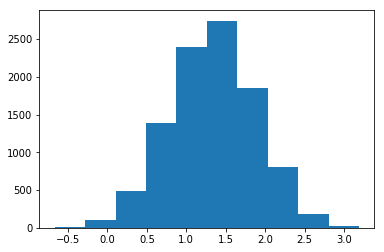

In [20]:
means_drinkers = []
means_nodrinkers = []
diff = []
for _ in range(10000):
    bootsample = sample_df.sample(150, replace=True)
    bootsample_drinkers = bootsample[bootsample['drinks_coffee']==True]
    bootsample_nodrinkers = bootsample[bootsample['drinks_coffee']==False]
    means_drinkers.append(bootsample_drinkers.height.mean())
    means_nodrinkers.append(bootsample_nodrinkers.height.mean())
    diff.append(bootsample_drinkers.height.mean() - bootsample_nodrinkers.height.mean())
plt.hist(diff)

In [21]:
np.std(means_nodrinkers)

0.46566289098726166

In [22]:
np.std(means_drinkers)

0.2810715662259628

In [23]:
np.std(diff)

0.5438584707754605

`4.` Now, use your observed sampling distribution for the difference in means and [the docs](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.random.normal.html) to simulate what you would expect the sampling distribution to be if the null hypothesis is true. You can do this be recentering your distribution at zero. Also, calculate the observed sample mean difference in `sample_data`. Use your solutions to answer the last questions in the quiz below.

(array([  19.,  141.,  724., 1831., 2756., 2586., 1421.,  442.,   68.,
          12.]),
 array([68.03930842, 68.44669975, 68.85409107, 69.26148239, 69.66887372,
        70.07626504, 70.48365636, 70.89104768, 71.29843901, 71.70583033,
        72.11322165]),
 <a list of 10 Patch objects>)

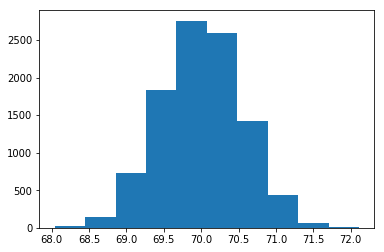

In [14]:
null_vals = np.random.normal(70, np.std(diff), 10000)
plt.hist(null_vals)

In [24]:
sample_mean = sample_df.height.mean()
sample_mean

67.57907352931666

H0: mi <= 70

H1: mi > 70

In [25]:
(null_vals > sample_mean).mean()

1.0

* Large p-value suggest that we shouldn't move away from the null hypothesis

H0: mi >= 70

H1: mi < 70

In [26]:
(null_vals < sample_mean).mean()

0.0

* Low p-value suggest that we reject the null hypothesis in favor of an alternative
* Now we would look at the values that are more extreme

In [28]:
null_mean = float(70)
(null_vals < sample_mean).mean() + (null_vals > null_mean + (null_mean - sample_mean)).mean()

0.0

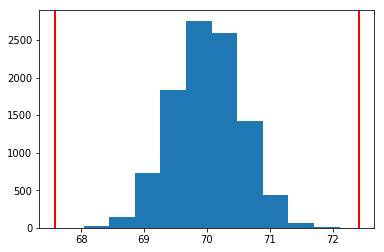

In [29]:
low = sample_mean
high = null_mean + (null_mean - sample_mean)

plt.hist(null_vals);
plt.axvline(x=low, color='r', linewidth=2)
plt.axvline(x=high, color='r', linewidth=2)

### Calculating Errors

Here are two datasets that represent two of the examples you have seen in this lesson.  

One dataset is based on the parachute example, and the second is based on the judicial example.  Neither of these datasets are based on real people.

Use the questions below to assist in answering the quiz questions at the bottom of this page.

In [1]:
import numpy as np
import pandas as pd

jud_data = pd.read_csv('judicial_dataset_predictions.csv')
par_data = pd.read_csv('parachute_dataset.csv')
jud_data.head()

,defendant_id,actual,predicted
0,22574,innocent,innocent
1,35637,innocent,innocent
2,39919,innocent,innocent
3,29610,guilty,guilty
4,38273,innocent,innocent


In [2]:
par_data.head()

,parachute_id,actual,predicted
0,3956,opens,opens
1,2147,opens,opens
2,2024,opens,opens
3,8325,opens,opens
4,6598,opens,opens


`1.` Above, you can see the actual and predicted columns for each of the datasets.  Using the **jud_data**, find the proportion of errors for the dataset, and furthermore, the percentage of errors of each type.  Use the results to answer the questions in quiz 1 below.  

**Hint for quiz:** an error is any time the prediction doesn't match an actual value.  Additionally, there are Type I and Type II errors to think about.  We also know we can minimize one type of error by maximizing the other type of error.  If we predict all individuals as innocent, how many of the guilty are incorrectly labeled?  Similarly, if we predict all individuals as guilty, how many of the innocent are incorrectly labeled?

In [5]:
# Take number of lines that are different and divide by the total
jud_total_lines = jud_data.shape[0]
jud_diff_lines = jud_data[jud_data['actual'] != jud_data['predicted']].shape[0]
jud_proportion_error = jud_diff_lines/jud_total_lines
jud_proportion_error

0.042152958945489497

In [10]:
# See the possible options
jud_data.actual.unique()

array(['innocent', 'guilty'], dtype=object)

In [16]:
# Calculate the jud false positives (mi) - type 1 error
jud_innocent_wrong = jud_data[(jud_data['actual']=='innocent') & (jud_data['predicted']=='guilty')].shape[0]
jud_innocent_error = jud_innocent_wrong/jud_total_lines
jud_innocent_error

0.001510366607167376

In [17]:
# Calculate the jud false negatives (beta) - type 2 error
jud_guilty_wrong = jud_data[(jud_data['actual']=='guilty') & (jud_data['predicted']=='innocent')].shape[0]
jud_guilty_error = jud_guilty_wrong/jud_total_lines
jud_guilty_error

0.04064259233832212

In [18]:
#If everyone was predicted as guilty, then every actual innocent 
#person would be a type I error.
# Type I = pred guilty, but actual = innocent
# A proporcao de erros do tipo I, se todos foram considerados culpados na previsao.

jud_data[jud_data['actual'] == 'innocent'].shape[0]/jud_data.shape[0]

0.45159961554304545

In [19]:
#If everyone has prediction of guilty, then no one is predicted inncoent
#Therefore, there would be no type 2 errors in this case
# Type II errs = pred innocent, but actual = guilty
# A proporcao de erros do tipo II, se todos foram considerados culpados na previsao.
0

0

`2.` Using the **par_data**, find the proportion of errors for the dataset, and furthermore, the percentage of errors of each type.  Use the results to answer the questions in quiz 2 below.

These should be very similar operations to those you performed in the previous question.

In [8]:
par_total_lines = par_data.shape[0]
par_diff_lines = par_data[par_data['actual'] != par_data['predicted']].shape[0]
par_proportion_error = par_diff_lines/par_total_lines
par_proportion_error

0.039972551037913875

In [20]:
# See the possible options
par_data['actual'].unique()

array(['opens', 'fails'], dtype=object)

In [26]:
# Calculate the jud false positives (mi) - type 1 error
par_fails_wrong = par_data[(par_data['actual']=='fails') & (par_data['predicted']=='opens')].shape[0]
par_fails_error = par_fails_wrong/par_total_lines
par_fails_error

0.00017155601303825698

In [23]:
# Calculate the jud false negatives (beta) - type 2 error
par_opens_wrong = par_data[(par_data['actual']=='opens') & (par_data['predicted']=='fails')].shape[0]
par_opens_error = par_opens_wrong/par_total_lines
par_opens_error

0.03980099502487562

In [29]:
#If every parachute was predicted to fail, what is the proportion
# of type I errors made?

# Type I = pred open, but actual = fail
# In the above situation since we have none predicted to open,
# we have no type I errors
# A proporcao de erros do tipo I, se a previsao de não abrir foi feita para todos os paraquedas
0

0

In [32]:
#If every parachute was predicted to not open, 
#the proportion of Type II Errors made.  

# This would just be the total of actual opens in the dataset, 
# as we would label these all as not open, but actually they open

# Type II = pred no open, but actual = open
par_data[par_data['actual'] == 'opens'].shape[0]/par_data.shape[0]

0.9917653113741637

### The Impact of Large Sample Sizes

When we increase our sample size, even the smallest of differences may seem significant.  

To illustrate this point, work through this notebook and the quiz questions that follow below.

Start by reading in the libraries and data.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
np.random.seed(42)

full_data = pd.read_csv('coffee_dataset.csv')
full_data.head()

,user_id,age,drinks_coffee,height
0,4509,<21,False,64.538179
1,1864,>=21,True,65.824249
2,2060,<21,False,71.319854
3,7875,>=21,True,68.569404
4,6254,<21,True,64.020226


`1.` In this case, imagine we are interested in testing if the mean height of all individuals in `full_data` is equal to 67.60 inches or **different** than 67.60.  First, use **quiz 1** below to identify the null and alternative hypotheses for these cases. 

H0: U = 67.6

H1: U != 67.6

`2.` Find:
* What is the population mean height?  
* What is the standard deviation of the population heights?  Create a sample set of data using the code below.  
* What is the sample mean height?  Simulate the sampling distribution for the mean of five values to see the shape and plot a histogram. 
* What is the standard deviation of the sampling distribution of the mean of five draws? 
Use **quiz 2** below to assure your answers are correct.  

In [3]:
sample1 = full_data.sample(5)
sample1

,user_id,age,drinks_coffee,height
469,6051,>=21,True,68.717822
2635,3405,>=21,True,69.015309
1898,7983,<21,False,66.418863
2795,6606,>=21,True,69.914371
167,4610,>=21,True,66.670203


In [9]:
# What is the population mean height?
pop_mean = full_data['height'].mean()
pop_mean

67.59748697307937

In [64]:
# What is the standard deviation of the population heights?
np.std(full_data['height'])

3.1189087116821472

In [28]:
# What is the sample mean height?
obs_mean = sample1.height.mean()
obs_mean

68.14731342421403

(array([   7.,   31.,  268., 1017., 2304., 3018., 2303.,  880.,  159.,
          13.]),
 array([61.65461416, 62.75030411, 63.84599407, 64.94168403, 66.03737399,
        67.13306395, 68.22875391, 69.32444387, 70.42013383, 71.51582378,
        72.61151374]),
 <a list of 10 Patch objects>)

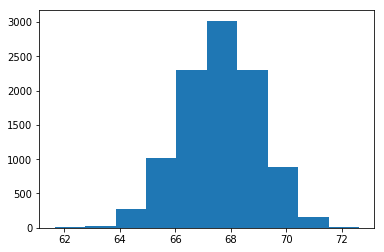

In [62]:
# Simulate the sampling distribution for the mean of five values to see the shape and plot a histogram
samp_mean = []
for _ in range(10000):
    samp = full_data.sample(5)
    samp_mean.append(samp.height.mean())
plt.hist(samp_mean)

In [63]:
# What is the standard deviation of the sampling distribution of the mean of five draws?
std_samp = np.std(samp_mean)
std_samp

1.3871491873568744

`3.` Using the null and alternative set up in question 1 and the results of your sampling distribution in question 2, simulate the mean values you would expect from the null hypothesis.  Use these simulated values to determine a p-value to make a decision about your null and alternative hypotheses.  Check your solution using **quiz 3** and **quiz 4** below.

**Hint:** Use the numpy documentation [here](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.random.normal.html) to assist with your solution.

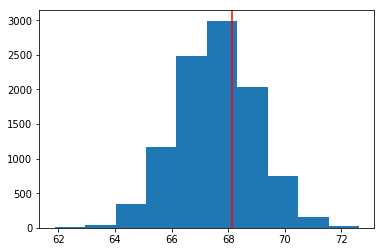

In [27]:
null_mean=67.60
null_vals = np.random.normal(null_mean, std_samp, 10000)
plt.hist(null_vals);
plt.axvline(x=sample1.height.mean(), color='red')

In [30]:
# probability of a statistic higher than observed and lower
prob_more_extreme_high = (null_vals > obs_mean).mean()
prob_more_extreme_low = (null_mean-(obs_mean-null_mean) < null_vals).mean()

pval = prob_more_extreme_low + prob_more_extreme_high
pval # We don't have statistically significant evidence to suggest the population mean is different from 67.6 inches (reject the Null)

0.9944

** The above is a second possible method for obtaining the p-value.  These are pretty different, stability of these values with such a small sample size is an issue. We are essentially shading outside the lines below.**

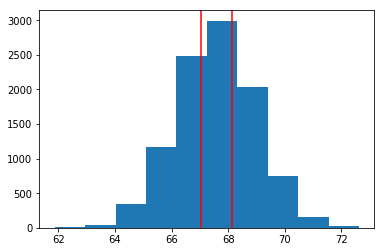

In [31]:
upper_bound = obs_mean
lower_bound = null_mean - (obs_mean - null_mean)

plt.hist(null_vals);
plt.axvline(x=lower_bound, color='red');
plt.axvline(x=upper_bound, color='red')

In [33]:
print(lower_bound,upper_bound)

67.05268657578596 68.14731342421403


`4.` Now imagine if you received the same sample mean as you calculated from the sample in question 1 above, but that you actually retrieved it from a sample of 300.  What would the new standard deviation be for your sampling distribution for the mean of 300 values?  Additionally, what would your new p-value be for choosing between the null and alternative hypotheses you set up? Simulate the sampling distribution for the mean of five values to see the shape and plot a histogram.  Use your solutions here to answer the second to last quiz question below.

**Hint:**  If you get stuck, notice you can use the solution from quiz regarding finding the p-value earlier to assist with obtaining this answer with just a few small changes.

In [47]:
samp_dist_mean300 = []
for _ in range(10000):
    sample_of_300 = full_data.sample(300)
    samp_dist_mean300.append(sample_of_300.height.mean())

In [48]:
# What would the new standard deviation be for your sampling distribution for the mean of 300 values?
samp_std_300 = np.std(samp_dist_mean300)
samp_std_300

0.17268875008448756

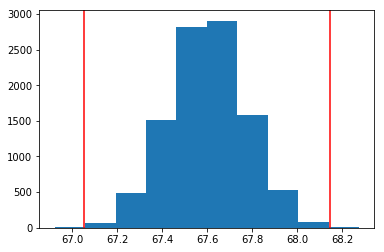

In [49]:
# what would your new p-value be for choosing between the null and alternative hypotheses you set up?
null_vals_300 = np.random.normal(null_mean, samp_std_300, 10000)
plt.hist(null_vals_300);
plt.axvline(x=lower_bound, color='red');
plt.axvline(x=upper_bound, color='red')

In [50]:
# probability of a statistic lower than observed and higher than observed
prob_more_extreme_low_300 = (null_vals_300 < lower_bound).mean()
prob_more_extreme_high_300 = (upper_bound < null_vals_300).mean()

pval = prob_more_extreme_low_300 + prob_more_extreme_high_300
pval # We do have 

0.0015

`5.` Reflect on what happened by answering the final quiz in this concept.

**Even with a very small difference between a sample mean and a hypothesized population mean, the difference will end up being significant with a very large sample size.**

In [65]:
null_mean = 67.60  
# esta é outra maneira de calcular o desvio padrão da distribuição amostral, teoricamente  
std_sampling_dist = full_data.height.std()/np.sqrt(5)  
num_sims = 10000

null_sims = np.random.normal(null_mean, std_sampling_dist, num_sims)  
low_ext = (null_mean - (sample1.height.mean() - null_mean))  
high_ext = sample1.height.mean()  

(null_sims > high_ext).mean() + (null_sims < low_ext).mean()

0.6982999999999999

In [68]:
samp_dist_mean1000 = []
for _ in range(10000):
    sample_of_1000 = full_data.sample(1000)
    samp_dist_mean1000.append(sample_of_1000.height.mean())
np.std(samp_dist_mean1000)

0.0806028108007766

### Multiple Tests

In this notebook, you will work with a similar dataset to the judicial dataset you were working with before.  However, instead of working with decisions already being provided, you are provided with a p-value associated with each individual.  

Use the questions in the notebook and the dataset to answer the questions at the bottom of this page.

Here is a glimpse of the data you will be working with:

In [71]:
import numpy as np
import pandas as pd

df = pd.read_csv('judicial_dataset_pvalues.csv')
df.head()

,defendant_id,actual,pvalue
0,22574,innocent,0.294126
1,35637,innocent,0.417981
2,39919,innocent,0.177542
3,29610,guilty,0.015023
4,38273,innocent,0.075371


`1.` Remember back to the null and alternative hypotheses for this example. Use that information to determine the answer for **Quiz 1** and **Quiz 2** below.

**A pvalue is the probability of observing your data or more extreme data, if the null is true.  Type I errors are when you choose the alternative when the null is true, and vice-versa for Type II.  Therefore, deciding an individual is guilty when they are actually innocent is a Type I error.  The alpha level is a threshold for the percent of the time you are willing to commit a Type I error.**

`2.` If we consider each individual as a single hypothesis test, find the conservative Bonferroni corrected p-value we should use to maintain a 5% type I error rate.

In [72]:
bonf_alpha = 0.05/df.shape[0]
bonf_alpha

6.86530275985171e-06

`3.` What is the proportion of type I errors made if the correction isn't used?  How about if it is used?  

Use your answers to find the solution to **Quiz 3** below.

**In order to find the number of type I errors made in without the correction - we need to find all those that are actually innocent with pvalues less than 0.05.**

In [79]:
df_innocent = df[df['actual']=='innocent']
df_error = df_innocent[df_innocent['pvalue'] < 0.05]
df_error.shape[0]/df.shape[0]

0.001510366607167376

In [82]:
df_bonf = df_innocent[df_innocent['pvalue'] < bonf_alpha]
df_bonf.shape[0]/df.shape[0]

0.0

`4.` Think about how hypothesis tests can be used, and why this example wouldn't exactly work in terms of being able to use hypothesis testing in this way.  Check your answer with **Quiz 4** below.

**This is looking at individuals, and that is more of the aim for machine learning techniques.  Hypothesis testing and confidence intervals are for population parameters. Therefore, they are not meant to tell us about individual cases, and we wouldn't obtain pvalues for individuals in this way. We could get probabilities, but that isn't the same as the probabilities associated with the relationship to sampling distributions as you have seen in these lessons.**

Os testes de hipoteses sao usados em parametros. Na pratica, eles olham para os individuos de uma populacao.

Isso está correto. Testes de hipóteses são usados em agregados - parâmetros de população. Realizar testes de hipóteses para qualquer indivíduo é uma das coisas vistas em um vídeo anterior. Um melhor caso de uso aqui seria regressão logística, o que você verá nas próximas aulas.